# High-resolution connectomics
---

Here, we have provided a sample example of using the high-resolution connectomes provided in our data release.

In this example we will load the high resolution connectome and plot the distribution of nodal strength for the sample connectomes.

---

In [1]:
# initial imports
import os
import urllib
import tempfile
import numpy as np
import seaborn as sns
import scipy.sparse as sparse

In [2]:
# location of a sample file in our remotely available data
file_url = 'https://swift.rc.nectar.org.au/v1/AUTH_ee5989f4c9184ea29012bb124cd3dff0/connectome_storage/HCP_1200/100408/high_resolution/functional_connectivity/100408_test_sparse_resting_functional_connectivity.npz'
tmp_file = 'tmp.npz'

# download from url
with open(tmp_file, 'w') as file:
    urllib.request.urlretrieve(file_url,tmp_file)

# Now load the sparse connectome data
connectome = sparse.load_npz(tmp_file)

# delete the downloaded file
os.remove(tmp_file)

**Note:** Runing the previous cell on will take a while for the connectome to be downloaded...

---

Now we can see that the `connectome` object is actually a sparse adjacency matrix:

In [3]:
connectome

<91282x91282 sparse matrix of type '<class 'numpy.float32'>'
	with 83324061 stored elements in COOrdinate format>

---

We can create and plot the nodal strength distribution by computing the sum across colums/rows:

In [4]:
strength = connectome.sum(axis=0)

In [5]:
strength.shape

(1, 91282)

Text(0.5, 1.0, 'probability distribution function of high-resolution nodal strength')

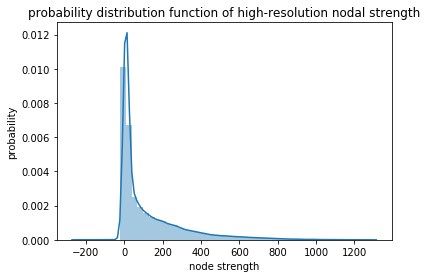

In [6]:
ax = sns.distplot(strength)
ax.set_xlabel('node strength')
ax.set_ylabel('probability')
ax.set_title('probability distribution function of high-resolution nodal strength')